# Chap04 - 머신러닝의 기본 요소

## Goals

- 모델 평가, 데이터 전처리, 특성 공학, 오버피팅에 대해 알아본다.

- 머신러닝 문제 해결을 위한 작업 프로세스에 대해 알아본다.

## 4.1 머신러닝의 네 가지 분류

- 일반적으로 머신러닝 알고리즘은 아래의 그림과 같이 4개의 범주안에 속한다.

![](./images/types.png)

### 4.1.1 지도 학습 (Supervised Learning)

- 샘플 데이터가 주어지면 알고있는 타겟(레이블)에 입력 데이터를 매핑하는 방법을 학습한다.

- 문자 판독, 음성 인식, 이미지 분류, 언어 번역 등이 지도학습에 속한다.


- 지도학습은 대부분 분류(classification)와 회귀(regression)로 구성되지만 다음과 같은 특이한 변종도 많다.

    - **시퀀스 생성**(sequence generation) : 사진이 주어지면 이를 설명하는 캡션을 생성한다. 시퀀스 생성은 일련의 분류 문제로 재구성할 수 있다.

    - **구문 트리**(syntax tree) **예측** : 문장이 주어지면 분해된 구문 트리를 예측한다.

    - **물체 감지**(object detection) : 사진이 주어지면 사진 안의 특정 물체 주위에 경계 상자(bounding box)를 그린다. 이것은 분류 문제로 표현되거나, 경계 상자의 좌표를 벡터 회귀로 예측하는 회귀 + 분류가 결합된 문제로 표현될 수 있다.

    - **이미지 분할**(image segmentation) : 사진이 주어졌을 때 픽셀 단위로 특정 물체에 마스킹(masking)을 한다.

### 4.1.2 비지도 학습 (Unsupervised Learning)

- 타겟(레이블)을 사용하지 않고, 입력 데이터에 대해 유의미한 정보를 찾는 방법이다.

- 데이터 시각화, 데이터 압축, 데이터의 노이즈 제거, 데이터에 있는 상관관계를 더 잘 이해하기 위해 사용한다.

- 비지도 학습으로는 대표적으로 **차원 축소**(dimensionality reduction)와 **군집**(clustering)이 있다.

### 4.1.3 준지도 학습 (Semi-supervised Learning)

- 전체 데이터 중에서 일부에만 레이블되어 있는 경우에 대해 학습하는 방법을 말한다.

- 대부분의 준지도 학습은 지도 학습과 비지도 학습의 조합으로 이루어진다.

### 4.1.4 자기 지도 학습 (Self-supervised Learning)

- 자기 지도 학습은 지도 학습의 특별한 경우라고 할 수 있다.

- 자기 지도 학습은 지도 학습이지만 사람이 만든 레이블을 사용하지 않는다.


- 레이블이 필요하지만 보통 경험적인 알고리즘(heuristic algorithm)을 사용해서 입력 데이터로부터 생성한다.

    - **오토인코더**(AutoEncoder)에서의 레이블은 입력 데이터 자신이다.

    - 지난 프레임이 주어졌을 때 비디오의 다음 프레임을 예측

    - 이전 단어가 주어졌을 때 다음 단어를 예측


- 지도 학습, 자기 지도 학습, 비지도 학습의 구분은 때때로 모호할 수 있다.

    - 오토인코더의 경우 타겟이 있으므로, (자기)지도학습으로 볼 수 있지만, 입력 데이터의 차원 축소 용도로 사용될 때는 비지도 학습으로 볼 수 있다.

### 4.1.5 강화 학습 (Reinforcement Learning)

- 강화 학습에서 **에이전트**(agent)는 환경에 대한 정보를 받아 보상을 최대화하는 행동을 선택하도록 학습한다.

<img src="./images/rl.png" height="50%" width="50%"/>

### 4.1.6 분류와 회귀에서 사용하는 용어

| 용어                                                         | 설명                                                         |
| ------------------------------------------------------------ | ------------------------------------------------------------ |
| **샘플(sample)** 또는 **입력(input)**                        | 모델에 주입될 하나의 데이터 포인트                           |
| **예측(predict)** 또는 **출력(output)**                      | 모델로부터 나오는 값                                         |
| **타겟(Target)**                                             | 정답, 모델이 완벽하게 예측해야 하는 값                       |
| **예측 오차(prediction error)** 또는 **손실 값(loss value)** : | 모델의 예측과 타깃 사이의 거리를 측정한 값                   |
| **클래스(class)**                                            | 분류 문제에서 선택할 수 있는 레이블의 집합                   |
| **레이블(label)**                                            | 분류 문제에서 클래스 할당의 구체적인 사례                    |
| **Ground-truth** 또는 **Annotation**                         | 데이터에셋에 대한 모든 타겟. 일반적으로 사람에 의해 수집된다. |
| **이진 분류**(Binary classification)                         | 각 입력 샘플이 2개의 범주로 구분되는 분류 작업               |
| **다중 분류**(Multiclass classification)                     | 각 입력 샘플이 2개 이상의 범주로 구분되는 분류 작업          |
| **다중 레이블 분류**(Multilabel classification)              | 각 입력 샘플이 여러 개의 레이블에 할당될 수 있는 분류 작업. 예를 들어 하나의 이미지에 고양이와 개가 있을 경우 '고양이'레이블과 '강아지'레이블이 모두 할당되어야 한다. |
| **스칼라 회귀**(Scalar regression)                           | 타겟이 연속적인 스칼라 값인 작업                             |
| **벡터 회귀**(Vector regression)                             | 타겟이 연속적인 값의 집합인 작업. 여러 값에 대한 회귀        |
| **미니 배치** 또는 **배치**(Mini-batch)                      | 모델에 의해 동시에 처리되는 소량의 샘플 묶음. 일반적으로 8 ~ 128이며, 샘플의 개수는 GPU의 메모리 할당이 용이하도록 2의 거듭제곱으로 한다. 훈련할 때 미니 배치마다 경사 하강법 업데이트 값을 계산한다. |

## 4.2 머신러닝 모델 평가

- 머신러닝의 목표는 처음 존 데이터에서 잘 작동하는 **일반화(generalized)**된 모델을 얻는 것이다.


### 4.2.1 훈련, 검증, 테스트 셋

- 모델 평가의 핵심은 데이터를 항상 훈련(training), 검증(valid), 테스트(test) 3개의 세트로 나누는 것이다.

    - 훈련 세트(training set)에서 모델을 훈련하고,
    
    - 검증 세트(validation set)에서 모델을 평가한다.
    
    - 테스트 세트를 이용해 모델을 테스트 한다.


- 전체 데이터 셋을 훈련과 테스트 2개만으로 나누지 않는 이유는, 모델을 개발할 때 항상 모델의 설정을 튜닝하기 때문이다.

    - 예를 들어, 층의 수나 층의 유닛 수를 조정할 수 있다. → 이러한 파라미터를 **하이퍼파라미터**(hyperparameter)라고 한다.


- 검증 세트에서 모델의 성능을 평가하여 이런 튜닝을 수행한다.
    
    - 이러한 튜닝 또한 어떠한 파라미터 공간에서 좋은 설정값을 찾는 **학습**이라 할 수 있다.


- 검증 세트를 이용해 설정을 튜닝하게 되면, **검증 세트에 오버피팅**될 수 있다.

    - 이러한 현상은 검증 세트의 모델 성능에 기반하여 모델의 하이퍼파라미터를 조정할 때마다 검증 데이터에 관한 정보가 모델로 새기 때문이다. → **정보 누설**(information leak)


- 따라서, 모델이 처음 본 데이터인 테스트 세트를 이용하여 모델을 평가한다.
    
    - 모델은 간접적으로라도 테스트 세트에 대한 어떠한 정보도 얻어서는 안된다.


- 데이터를 훈련/검증/테스트 세트로 나누는 대표적인 방법으로는 다음과 같이 세가지 방법이 있다.
    
    - 홀드아웃 검증 (hold-out validation)
    
    - K-폴드 교차 검증 (K-fold cross-validation)
    
    - 셔플링(shuffling)을 사용한 iterated K-fold cross-validation


#### Simple Hold-Out Validation

- 전체 데이터 셋에서 일정량을 테스트 셋으로 떼어 놓는다.


- 남은 데이터에서 훈련하고 검증 세트로 평가한다.



![hold-out-validation](./images/hold-out.PNG)



- `NumPy`를 이용한 홀드아웃 검증 구현 코드는 다음과 같다.

```python
import numpy as np

num_validation_samples = 10000

np.random.shuffle(data)  # 데이터를 섞는것이 일반적으로 좋다.

validation_data = data[:num_validation_samples]  # 검증 셋을 만든다.
training_data = data[num_validation_samples:]  # 훈련 셋을 만든다.
```



- `Scikit-learn`을 이용한 홀드아웃 검증 구현은 다음과 같다.

```python
from sklearn.model_selection import train_test_split

train_dat, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.33, random_state=42)
```



- 홀드아웃의 단점은 데이터가 적을 때, 검증 세트와 테스트 세트의 샘플이 너무 적어 주어진 전체 데이터를 통계적으로 대표하지 못할 수 있다.


#### K-Fold Cross Validation

- 데이터를 동일한 크기를 가진 `K`개의 분할로 나눈다.

- 각 분할 `i`에 대해 남은 `K-1`개의 분할로 모델을 훈련하고 분할 `i`에 대해 모델을 평가한다.

- 최종 점수는 `K`개의 점수의 평균을 구한다.

- 모델의 성능이 데이터 분할에 때라 편차가 클 때 유용하다.

- 모델의 튜닝에 별개의 검증 세트를 사용하게 된다.

![k-fold_cross_validation](./images/k-fold.PNG)



- K-fold cross validation의 구현 코드는 아래와 같다.

```python
k = 4
num_validation_samples = len(data) // k

np.random.shuffle(data)

validation_scores = []
for fold in range(k):
    # 검증 데이터 부분을 선택한다.
    validation_data = data[num_validation_samples * fold : num_validation_samples * (fold + 1)]
    # 남은 데이터를 훈련 데이터로 사용한다. 
    # 리스트에서 + 연산자는 두 리스트를 연결한다.
    training_data = data[:num_validation_samples * fold] + 
    	data[num+validation_samples * (fold + 1):]
    
    model = get_model()  # 훈련되지 않은 새로운 모델을 만든다.
    model.train(training_data)
    validation_score = model.evaluate(validation_data)
    validation_scores.append(validation_score)
    
validation_score = np.average(validation_scores)  # 검증 점수: K개의 폴드에 대한 평균

model = get_model()  
model.train(data)  # 테스트 데이터를 제외한 전체 데이터로 최종 모델을 훈련
test_score = model.evaluate(test_data)
```



- k-fold cross validation은 `scikit-learn`의 `cross_validate()`함수를 이용해 쉽게 구현할 수 있는데, 케라스 모델을 사이킷런과 호환되도록 `KerasClassifier`나 `KerasRegressor` 클래스로 모델을 감싸줘야 한다.

```python
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_validate

model = KerasClassifier(build_fn=get_model, epochs=150, batch_size=128, verbose=0)
kfold = cross_validate(model, data, labels, cv=4)
```

#### Iterated K-fold Validation with Suffling

- K-fold 검증을 여러 번 적용하되, `K`개의 분할로 나누기 전에 매번 데이터를 랜덤하게 섞는다.

- `P x K`개(P는 반복 횟수)의 모델을 훈련하고 평가하기 때문에 비용이 매우 많이 든다.

- 최종 점수는 모든 K-fold 검증(`P x K`)의 평균이다.

- 데이터가 적고 가능한 정확하게 모델을 평가하고자 할 때 사용한다.

- Kaggle에서는 이 방법이 매우 도움이 된다고 한다.

- 이 방법에 대한 예제는 해당 링크에서 확인할 수 있다. → [[링크](https://tensorflow.blog/2017/12/27/%EB%B0%98%EB%B3%B5-%EA%B5%90%EC%B0%A8-%EA%B2%80%EC%A6%9D/)]

### 4.2.2 유의해야 할 것

1. **대표성 있는 데이터** : 훈련 세트와 테스트 세트로 나누기 전에 데이터를 랜덤하게 섞어 주는 것이 좋다.

2. **시간의 방향** : 과거로 부터 미래를 예측해야 하는 시계열 데이터의 경우에는 데이터를 분할하기 전에 랜덤하게 섞어서는 절대로 안된다. 따라서, 테스트 데이터는 훈련 데이터보다 미래의 것이어야 한다.

3. **데이터 중복** : 훈련 세트와 검증 세트가 중복되지 않아야 한다.

## 4.3 데이터 전처리, 특성 공학, 특성 학습

### 4.3.1 신경망을 위한 데이터 전처리

- 데이터 전처리(data preprocessing)의 목적은 주어진 원본 데이터를 신경망에 적용하기 쉽도록 만드는 것이다.

- 벡터화(vectorization), 정규화(normalization), 누락된 값 다루기, 특성 추출(feature extraction) 등이 있다.

#### 벡터화 (Vectorization)

- 신경망에서 모든 입력과 타겟(레이블)은 부동 소수(`float`)데이터(특정 경우에는 정수)로 이루어진 **텐서**(tensor)여야 한다.

- 사운드, 이미지, 텍스트 등의 입력은 먼저 텐서로 변환해야 하는데 이러한 단계를 **데이터 벡터화(data vectorization)**라고 한다.

#### 정규화 (Normalization)

- 신경망에서 입력 데이터는 네트워크에 주입하기 전에 각 특성(feature)별로 독립적으로 정규화 해줘야 한다.

- 일반적으로 네트워크의 **가중치 초기값보다 큰 입력 데이터**이거나, 각 **특성의 범위가 균일하지 않는 데이터**(예를 들어 한 특성의 범위는 0~1, 다른 특성은 100~200인 경우)를 신경망에 주입하는 것은 좋지 않다.
    - 이러한 경우에 업데이트할 그래디언트가 커져 네트워크가 제대로 수렴하지 못하는 문제가 발생한다.


- 네트워크가 쉽게 학습하기 위해서는 입력 데이터가 다음과 같은 특징을 따라야 한다.
    - **작은 값**이어야 한다. 일반적으로 `0 ~ 1` 사이로 정규화 한다. 
        - 자주 사용 되는 방법은 각 특성이 평균이 0이고, 표준편차가 1이되도록 정규화 해준다.
    - **균일**해야 한다. 모든 특성이 비슷한 범위를 가져야 한다.

#### 누락된 값(Missing Values) 다루기

- 이따금 데이터에는 누락된 값(결측값, missing values)이 있을 수 있다.


- 일반적으로 신경망에서 `0`이 특별한 의미를 가지는 값이 아니라면, 누락된 값을 `0`으로 입력해도 된다.
   
   - 네트워크가 `0`이 누락된 데이터를 의미한다는 것을 학습하면, 이 값을 무시하게 된다.


- 훈련(training) 세트에 누락된 값을 해당 특성의 평균(mean) 또는 중간값(median)으로 대체할 경우에는 그 값을 저장해 놓아야 한다.
    
    - 테스트 세트에서 해당 특성에 누락된 값이 있다면 훈련 세트에서 구한 값으로 채워줘야 한다.
    
    - 마찬 가지로 검증 데이터 세트에도 동일하게 훈련 세트에서 구한 값으로 채워준다.


- 훈련 세트에는 결측값이 없는데 테스트 세트에서는 결측값이 있을 경우에는 네트워크는 결측값을 무시하는 법을 알지 못한다.
    
    - 이럴 경우에는 누락된 값이 있는 훈련 샘플을 임의로 만들어줘야 한다.


### 4.3.2 특성 공학 (Feature Engineering)

- 특성 공학은 데이터와 머신러닝 알고리즘에 관한 지식을 사용하는 것이라 할 수 있다.

- 모델에 데이터를 주입하기 전에 **하드코딩**된 변환을 적용하여 알고리즘이 더 잘 수행되도록 만들어 준다.

    - 모델이 잘 학습할 수 있도록 데이터를 재 표현하는 방법을 의미한다.


- 특성 공학의 핵심은 특성을 더 간단한 방식으로 표현하여 문제를 쉽게 만드는 것이다.

- 딥러닝에서는 신경망이 자동으로 원본 데이터에서 유용한 특성을 추출할 수 있기 때문에 특성 공학의 중요도가 높진 않다.

    - 하지만, 특성 공학을 사용하면 다음과 같은 장점이 있다.
    
        - 좋은 특성은 적은 자원을 사용해 문제를 쉽게 해결할 수 있다.
    
        - 좋은 특성은 더 적은 데이터로 문제를 풀 수 있다.

## 4.4. 과대적합과 과소적합

![](./images/overfitting.png)




- 머신러닝의 근본적인 이슈는 최적화와 일반화 사이의 줄다리기라고 할 수 있다.

- **최적화**(optimization)는 훈련 데이터에서 최고의 성능을 얻기위해 모델을 조정하는 과정이다 → 학습(learning)

- **일반화**(generalization)는 학습된 모델이 새로운 데이터에 대해 얼마나 잘 수행하는지를 의미한다.

- **과소적합**(underfitting)은 훈련 데이터의 손실이 낮아질수록 검증 데이터의 손실도 낮아지는 단계를 말한다.


- **과대적합**(overfitting)은 훈련 데이터의 손실은 낮아지지만 검증 세트의 손실이 증가하게 되는 상황을 말한다.
    
    - 훈련 데이터에 특화된 패턴을 학습하기 시작했다는 의미이다.
    
    - 과대적합을 없애기 위해서 가장 좋은 방법은 **더 많은 훈련 데이터를 모으는 것이다.**
    
    - 데이터를 더 모으는 것이 불가능할 때 모델이 훈련 데이터에서 학습할 수 있는 패턴에 제약을 가해 과대적합을 피할 수 있는데, 이를 **규제(regularization)**라고 한다.



![](./images/overfitting04.png)

### 4.4.1 네트워크 크기 축소

- 과대적합을 막는 가장 단순한 방법은 모델의 크기, 모델에 있는 학습 파라미터의 수를 줄이는 것이다.

    - 파라미터의 수는 층의 수와 각 층의 유닛 수에 의해 결정된다.
    
    - 딥러닝에서 모델에 있는 학습 파라미터의 수를 모델의 용량(capacity)라고도 한다.


- 적절한 모델 크기를 찾는 일반적인 작업 흐름은 우선 적은 수의 층과 파라미터로 시작한다. 그런 다음 검증 손실이 감소되기 시작할 때까지 층이나 유닛의 수를 늘려 나간다.

---

### 실습

- 노트: 이 노트북에서는 편의상 IMDB 테스트 세트를 검증 세트로 사용합니다.

- [3.4 영화 리뷰 분류](https://github.com/ExcelsiorCJH/Deep-Learning-with-Python/blob/master/Chap03-Getting_started_with_neural_networks/3.4-classifying_movie_reviews.ipynb)절에 있는 코드를 사용해 데이터를 준비합니다:

In [1]:
import keras
keras.__version__

Using TensorFlow backend.


'2.2.4'

In [3]:
from keras.datasets import imdb
import numpy as np

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    # 크기가 (len(sequences), dimension))이고 모든 원소가 0인 행렬을 만듭니다
    results = np.zeros((len(sequences), dimension))
    for idx, sequence in enumerate(sequences):
        results[idx, sequence] = 1  # results[i]에서 특정 인덱스의 위치를 1로 만듭니다
    return results

# 훈련 데이터를 벡터로 변환합니다
x_train = vectorize_sequences(train_data)
# 테스트 데이터를 벡터로 변환합니다
x_test = vectorize_sequences(test_data)
# 레이블을 벡터로 변환합니다
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

print('train_data.shape : {}'.format(x_train.shape))
print('train_labels.shape : {}'.format(y_train.shape))
print('test_data.shape : {}'.format(x_test.shape))
print('test_labels.shape : {}'.format(y_test.shape))

train_data.shape : (25000, 10000)
train_labels.shape : (25000,)
test_data.shape : (25000, 10000)
test_labels.shape : (25000,)


영화 리뷰 분류 모델에 적용해 보죠. 원래 네트워크는 다음과 같습니다:

In [11]:
from keras import models
from keras import layers
from keras import backend as K

K.clear_session()

original_model = models.Sequential()
original_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
original_model.add(layers.Dense(16, activation='relu'))
original_model.add(layers.Dense(1, activation='sigmoid'))

original_model.compile(optimizer='rmsprop', 
                       loss='binary_crossentropy',
                       metrics=['acc'])

original_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                160016    
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


더 작은 네트워크로 바꾸어 보죠:

In [12]:
smaller_model = models.Sequential()
smaller_model.add(layers.Dense(6, activation='relu', input_shape=(10000,)))
smaller_model.add(layers.Dense(6, activation='relu'))
smaller_model.add(layers.Dense(1, activation='sigmoid'))

smaller_model.compile(optimizer='rmsprop',
                      loss='binary_crossentropy',
                      metrics=['acc'])

smaller_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 6)                 60006     
_________________________________________________________________
dense_5 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 7         
Total params: 60,055
Trainable params: 60,055
Non-trainable params: 0
_________________________________________________________________


원본 네트워크와 축소된 네트워크의 검증 손실을 비교해 보죠. 점으로 표현된 것이 작은 네트워크이고 덧셈 기호가 원래 네트워크 입니다(검증 손실이 작은 것이 좋은 모델입니다).

In [13]:
original_hist = original_model.fit(x_train, y_train,
                                   epochs=20,
                                   batch_size=512,
                                   validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 3s 129us/step - loss: 0.4606 - acc: 0.8173 - val_loss: 0.3495 - val_acc: 0.8751
Epoch 2/20
25000/25000 [==============================] - 1s 49us/step - loss: 0.2628 - acc: 0.9118 - val_loss: 0.3247 - val_acc: 0.8658
Epoch 3/20
25000/25000 [==============================] - 1s 48us/step - loss: 0.2039 - acc: 0.9267 - val_loss: 0.2822 - val_acc: 0.8879
Epoch 4/20
25000/25000 [==============================] - 1s 48us/step - loss: 0.1719 - acc: 0.9388 - val_loss: 0.2913 - val_acc: 0.8838
Epoch 5/20
25000/25000 [==============================] - 1s 46us/step - loss: 0.1483 - acc: 0.9485 - val_loss: 0.3185 - val_acc: 0.8764
Epoch 6/20
25000/25000 [==============================] - 1s 49us/step - loss: 0.1296 - acc: 0.9564 - val_loss: 0.3280 - val_acc: 0.8768
Epoch 7/20
25000/25000 [==============================] - 1s 50us/step - loss: 0.1157 - acc: 0.9594 - val_loss: 0.3525 - val_ac

In [14]:
smaller_model_hist = smaller_model.fit(x_train, y_train,
                                       epochs=20,
                                       batch_size=512,
                                       validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 1s 55us/step - loss: 0.5053 - acc: 0.8091 - val_loss: 0.4055 - val_acc: 0.8645
Epoch 2/20
25000/25000 [==============================] - 1s 49us/step - loss: 0.3203 - acc: 0.9032 - val_loss: 0.3199 - val_acc: 0.8855
Epoch 3/20
25000/25000 [==============================] - 1s 48us/step - loss: 0.2420 - acc: 0.9228 - val_loss: 0.2882 - val_acc: 0.8880
Epoch 4/20
25000/25000 [==============================] - 1s 50us/step - loss: 0.2004 - acc: 0.9328 - val_loss: 0.2807 - val_acc: 0.8886
Epoch 5/20
25000/25000 [==============================] - 1s 49us/step - loss: 0.1735 - acc: 0.9428 - val_loss: 0.2859 - val_acc: 0.8854
Epoch 6/20
25000/25000 [==============================] - 1s 50us/step - loss: 0.1543 - acc: 0.9480 - val_loss: 0.2927 - val_acc: 0.8826
Epoch 7/20
25000/25000 [==============================] - 1s 49us/step - loss: 0.1383 - acc: 0.9537 - val_loss: 0.3056 - val_acc

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt

In [16]:
epochs = range(1, 21)
original_val_loss = original_hist.history['val_loss']
smaller_model_val_loss = smaller_model_hist.history['val_loss']

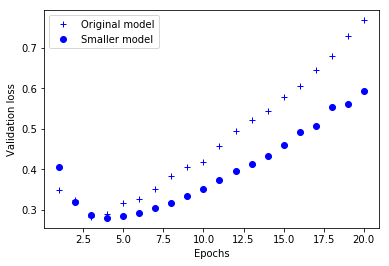

In [17]:
# ‘b+’는 파란색 덧셈 기호을 의미합니다
plt.plot(epochs, original_val_loss, 'b+', label='Original model')
# ‘bo’는 파란색 점을 의미합니다
plt.plot(epochs, smaller_model_val_loss, 'bo', label='Smaller model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

여기서 볼 수 있듯이 작은 네트워크가 기본 네트워크보다 더 나중에 과대적합되기 시작했습니다(네 번째 에포크가 아니라 여섯 번째 에포크에서). 과대적합이 시작되었을 때 성능이 더 천천히 감소되었습니다.

이번에는 문제에 필요한 것보다 훨씬 더 많은 용량을 가진 네트워크를 비교해 보겠습니다:

In [18]:
bigger_model = models.Sequential()
bigger_model.add(layers.Dense(1024, activation='relu', input_shape=(10000,)))
bigger_model.add(layers.Dense(1024, activation='relu'))
bigger_model.add(layers.Dense(1, activation='sigmoid'))

bigger_model.compile(optimizer='rmsprop',
                     loss='binary_crossentropy',
                     metrics=['acc'])

bigger_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 1024)              10241024  
_________________________________________________________________
dense_8 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 1025      
Total params: 11,291,649
Trainable params: 11,291,649
Non-trainable params: 0
_________________________________________________________________


In [19]:
bigger_model_hist = bigger_model.fit(x_train, y_train,
                                     epochs=20,
                                     batch_size=512,
                                     validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 2s 71us/step - loss: 0.5460 - acc: 0.7878 - val_loss: 0.2757 - val_acc: 0.8888
Epoch 2/20
25000/25000 [==============================] - 1s 59us/step - loss: 0.2183 - acc: 0.9144 - val_loss: 0.3216 - val_acc: 0.8716
Epoch 3/20
25000/25000 [==============================] - 2s 62us/step - loss: 0.1230 - acc: 0.9591 - val_loss: 0.3361 - val_acc: 0.8868
Epoch 4/20
25000/25000 [==============================] - 2s 65us/step - loss: 0.0510 - acc: 0.9832 - val_loss: 0.4724 - val_acc: 0.8836
Epoch 5/20
25000/25000 [==============================] - 2s 62us/step - loss: 0.0783 - acc: 0.9875 - val_loss: 0.5107 - val_acc: 0.8838
Epoch 6/20
25000/25000 [==============================] - 2s 61us/step - loss: 4.9197e-04 - acc: 1.0000 - val_loss: 0.6768 - val_acc: 0.8828
Epoch 7/20
25000/25000 [==============================] - 2s 61us/step - loss: 0.1128 - acc: 0.9881 - val_loss: 0.7698 - val

다음은 더 큰 네트워크가 기본 네트워크에 비해 얼마나 차이나는지를 보여줍니다. 점이 용량이 큰 네트워크의 검증 손실이고 덧셈 기호는 원본 네트워크의 검증 손실입니다.

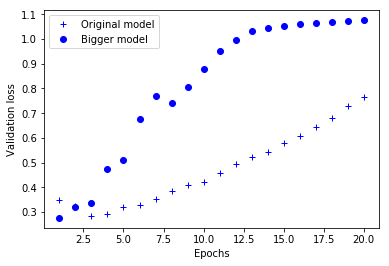

In [20]:
bigger_model_val_loss = bigger_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, bigger_model_val_loss, 'bo', label='Bigger model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

용량이 큰 네트워크는 첫 번째 에포크 이후 거의 바로 과대적합이 시작되어 갈수록 더 심해집니다. 검증 손실도 매우 불안정합니다.

다음은 두 네트워크의 훈련 손실입니다:

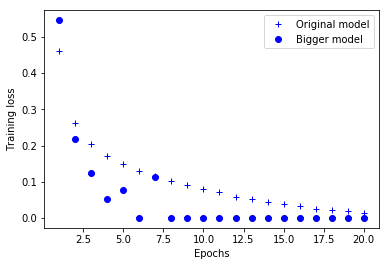

In [21]:
original_train_loss = original_hist.history['loss']
bigger_model_train_loss = bigger_model_hist.history['loss']

plt.plot(epochs, original_train_loss, 'b+', label='Original model')
plt.plot(epochs, bigger_model_train_loss, 'bo', label='Bigger model')
plt.xlabel('Epochs')
plt.ylabel('Training loss')
plt.legend()

plt.show()

여기서 볼 수 있듯이 용량이 큰 네트워크는 훈련 손실이 매우 빠르게 0에 가까워집니다. 용량이 많은 네트워크일수록 더 빠르게 훈련 데이터를 모델링할 수 있습니다(결국 훈련 손실이 낮아집니다). 하지만 더욱 과대적합에 민감해집니다(결국 훈련과 검증 손실 사이에 큰 차이가 발생합니다).

### 4.4.2 가중치 규제 추가

- **오컴의 면도날**(Occam's razor) : 어떤 것에 대한 두가지의 설명이 있다면 더 적은 가정이 필요한 간단한 설명이 옳을 것이라는 이론
    
    - 이러한 이론은 딥러닝 모델에도 적용된다.


- 복잡한 모델이 간단한 모델보다 과대적합될 가능성이 높다.

- 간단한 모델은 적은 수의 파라미터를 가진 모델을 말한다.

- 과대적합을 완화하기 위한 방법은 네트워크의 복잡도에 제한을 두어 가중치가 작은 값을 가지도록 제약을 가하는 것이다.
    
    - 가중치를 작게 만든다는 의미는 특정값(outlier 등)의 영향을 적게 받도록 해줌으로써, 결과적으로 일반화에 적합한 특성을 갖게 만드는 것이라 할 수 있다. → [[링크]](https://m.blog.naver.com/laonple/220527647084) 참고
    
    - 이러한 제약을 통해 가중치 값의 분포가 더 균일하게 된다.


- 이를 **가중치 규제**(weight regularization)라고 하며, 네트워크의 손실함수에 큰 가중치에 연관된 비용을 추가하는 데, 두 가지 형태의 비용이 있다.
    
    - **L1 규제** : 가중치의 절대값에 비례하는 비용이 추가된다(가중치의 L1 노름). → $\lambda  \mid w \mid$
    
    - **L2 규제** : 가중치의 제곱에 비례하는 비용이 추가된다(가중치의 L2 노름). L2 규제는 신경망에서 가중치 감쇠(weight decay)라고도 부른다. → $\frac{1}{2} \lambda w^2$

---

### 실습

케라스에서 가중치 규제 인스턴스를 층의 키워드 매개변수로 전달하여 가중치 규제를 추가할 수 있습니다. 영화 리뷰 분류 네트워크에 L2 가중치 규제를 추가해 보죠:

In [26]:
from keras import regularizers

K.clear_session()

l2_model = models.Sequential()
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu', input_shape=(10000,)))
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001), 
                          activation='relu'))
l2_model.add(layers.Dense(1, activation='sigmoid'))

l2_model.compile(optimizer='rmsprop', 
                 loss='binary_crossentropy',
                 metrics=['acc'])

l2_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                160016    
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


`l2(0.001)`는 가중치 행렬의 모든 원소를 제곱하고 `0.001`($\lambda = 0.001$)을 곱하여 네트워크의 전체 손실에 더해진다는 의미입니다. 이 페널티 항은 훈련할 때만 추가됩니다. 이 네트워크의 손실은 테스트보다 훈련할 때 더 높을 것입니다.

L2 규제 페널티의 효과를 확인해 보죠:

In [27]:
l2_model_hist = l2_model.fit(x_train, y_train,
                             epochs=20,
                             batch_size=512,
                             validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 1s 52us/step - loss: 0.4833 - acc: 0.8261 - val_loss: 0.3740 - val_acc: 0.8826
Epoch 2/20
25000/25000 [==============================] - 1s 49us/step - loss: 0.3068 - acc: 0.9078 - val_loss: 0.3636 - val_acc: 0.8684
Epoch 3/20
25000/25000 [==============================] - 1s 50us/step - loss: 0.2658 - acc: 0.9221 - val_loss: 0.3755 - val_acc: 0.8641
Epoch 4/20
25000/25000 [==============================] - 1s 50us/step - loss: 0.2468 - acc: 0.9291 - val_loss: 0.3355 - val_acc: 0.8857
Epoch 5/20
25000/25000 [==============================] - 1s 50us/step - loss: 0.2356 - acc: 0.9333 - val_loss: 0.3988 - val_acc: 0.8624
Epoch 6/20
25000/25000 [==============================] - 1s 49us/step - loss: 0.2264 - acc: 0.9361 - val_loss: 0.3540 - val_acc: 0.8797
Epoch 7/20
25000/25000 [==============================] - 1s 49us/step - loss: 0.2213 - acc: 0.9385 - val_loss: 0.3553 - val_acc

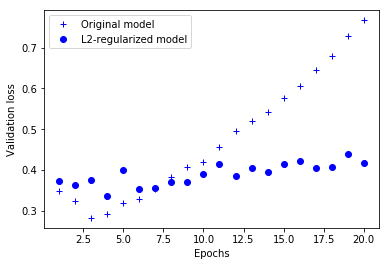

In [28]:
l2_model_val_loss = l2_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, l2_model_val_loss, 'bo', label='L2-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

여기서 볼 수 있듯이 두 모델이 동일한 파라미터 수를 가지고 있더라도 L2 규제를 사용한 모델(점)이 기본 모델(덧셈 기호)보다 훨씬 더 과대적합에 잘 견디고 있습니다.

케라스에서 L2 규제 대신에 다음과 같은 가중치 규제 중 하나를 사용할 수 있습니다:

```python
from keras import regularizers

# L1 규제
regularizers.l1(0.001)

# L1과 L2 규제 병행
regularizers.l1_l2(l1=0.001, l2=0.001)
```

#### `l1(0.0001)` 모델과 비교

In [30]:
K.clear_session()

l1_model = models.Sequential()
l1_model.add(layers.Dense(16, kernel_regularizer=regularizers.l1(0.0001),
                          activation='relu', input_shape=(10000,)))
l1_model.add(layers.Dense(16, kernel_regularizer=regularizers.l1(0.0001),
                          activation='relu'))
l1_model.add(layers.Dense(1, activation='sigmoid'))

l1_model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['acc'])

In [31]:
l1_model_hist = l1_model.fit(x_train, y_train,
                             epochs=20,
                             batch_size=512,
                             validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 1s 55us/step - loss: 0.5612 - acc: 0.8199 - val_loss: 0.4381 - val_acc: 0.8751
Epoch 2/20
25000/25000 [==============================] - 1s 49us/step - loss: 0.3812 - acc: 0.8924 - val_loss: 0.3923 - val_acc: 0.8740
Epoch 3/20
25000/25000 [==============================] - 1s 51us/step - loss: 0.3413 - acc: 0.9008 - val_loss: 0.3614 - val_acc: 0.8888
Epoch 4/20
25000/25000 [==============================] - 1s 50us/step - loss: 0.3243 - acc: 0.9067 - val_loss: 0.3582 - val_acc: 0.8870
Epoch 5/20
25000/25000 [==============================] - 1s 49us/step - loss: 0.3132 - acc: 0.9133 - val_loss: 0.3705 - val_acc: 0.8817
Epoch 6/20
25000/25000 [==============================] - 1s 49us/step - loss: 0.3060 - acc: 0.9150 - val_loss: 0.3720 - val_acc: 0.8806
Epoch 7/20
25000/25000 [==============================] - 1s 50us/step - loss: 0.3023 - acc: 0.9151 - val_loss: 0.3856 - val_acc

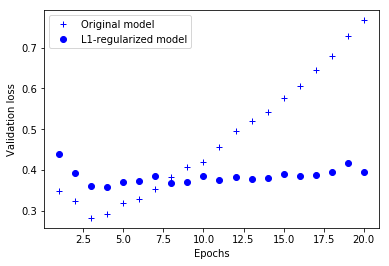

In [32]:
l1_model_val_loss = l1_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, l1_model_val_loss, 'bo', label='L1-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

#### `l1_l2(l1=0.0001, l2=0.0001)`모델과 비교

In [34]:
K.clear_session()

l1l2_model = models.Sequential()
l1l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l1_l2(l1=0.0001, l2=0.0001),
                            activation='relu', input_shape=(10000,)))
l1l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l1_l2(l1=0.0001, l2=0.0001),
                            activation='relu'))
l1l2_model.add(layers.Dense(1, activation='sigmoid'))

l1l2_model.compile(optimizer='rmsprop',
                   loss='binary_crossentropy',
                   metrics=['acc'])

In [35]:
l1l2_model_hist = l1l2_model.fit(x_train, y_train,
                                 epochs=20,
                                 batch_size=512,
                                 validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 1s 54us/step - loss: 0.5561 - acc: 0.8107 - val_loss: 0.4203 - val_acc: 0.8811
Epoch 2/20
25000/25000 [==============================] - 1s 49us/step - loss: 0.3675 - acc: 0.8980 - val_loss: 0.4181 - val_acc: 0.8600
Epoch 3/20
25000/25000 [==============================] - 1s 50us/step - loss: 0.3336 - acc: 0.9046 - val_loss: 0.3930 - val_acc: 0.8730
Epoch 4/20
25000/25000 [==============================] - 1s 49us/step - loss: 0.3155 - acc: 0.9100 - val_loss: 0.3670 - val_acc: 0.8859
Epoch 5/20
25000/25000 [==============================] - 1s 49us/step - loss: 0.3045 - acc: 0.9156 - val_loss: 0.3609 - val_acc: 0.8871
Epoch 6/20
25000/25000 [==============================] - 1s 50us/step - loss: 0.2979 - acc: 0.9191 - val_loss: 0.3675 - val_acc: 0.8838
Epoch 7/20
25000/25000 [==============================] - 1s 49us/step - loss: 0.2867 - acc: 0.9236 - val_loss: 0.3674 - val_acc

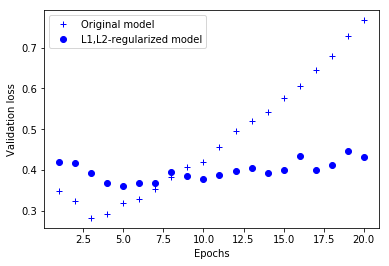

In [36]:
l1l2_model_val_loss = l1l2_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, l1l2_model_val_loss, 'bo', label='L1,L2-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

### 4.4.3 드롭아웃 (Dropout)

- **드롭아웃(dropout)** 은 신경망에서 사용되는 규제 기법 중에서 가장 효과적이고 널리 사용되는 방법 중 하나다.

- 드롭아웃의 핵심 아이디어는 층의 출력값에 노이즈(랜덤하게 끄는것)를 추가하여 중요하지 않은 우연한 패턴을 네트워크가 학습하지 못하게 하는 것이다.

- 네트워크 층에 드롭아웃을 적용하면 **훈련하는 동안** 랜덤하게 층의 일부 출력 특성(유닛)을 제외시킨다(0으로 만든다).

<img src="./images/dropout.png" height="60%" width="60%" />

- 드롭아웃 비율(`p`)은 일반적으로 `0.2 ~ 0.5`로 설정한다.

- 테스트 단계에서는 어떠한 유닛도 드롭아웃 되지 않는다.

    - 그 대신 층의 출력을 드롭아웃 비율(`p`)에 비례하여 줄여준다. → `layer_output *= p`

    - 그 이유는 훈련할 때보다 더 많은 유닛이 활성화되기 때문이다. → keras에서는 자동으로 계산해줌


- 케라스에서는 층의 출력 바로 뒤에 `Dropout`층을 추가하여 네트워크에 드롭아웃을 적용할 수 있다.

```python
from keras import layers

model.add(layers.Dropout(0.5))
```

---

### 실습

IMDB 네트워크에 두 개의 `Dropout` 층을 추가하고 과대적합을 얼마나 줄여주는지 확인해 보겠습니다:

In [40]:
K.clear_session()

dpt_model = models.Sequential()
dpt_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(16, activation='relu'))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(1, activation='sigmoid'))

dpt_model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['acc'])

dpt_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                160016    
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dropout_2 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [41]:
dpt_model_hist = dpt_model.fit(x_train, y_train,
                               epochs=20,
                               batch_size=512,
                               validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 1s 53us/step - loss: 0.6149 - acc: 0.6647 - val_loss: 0.4858 - val_acc: 0.8618
Epoch 2/20
25000/25000 [==============================] - 1s 49us/step - loss: 0.4733 - acc: 0.7988 - val_loss: 0.3626 - val_acc: 0.8819
Epoch 3/20
25000/25000 [==============================] - 1s 49us/step - loss: 0.3790 - acc: 0.8533 - val_loss: 0.3065 - val_acc: 0.8885
Epoch 4/20
25000/25000 [==============================] - 1s 50us/step - loss: 0.3171 - acc: 0.8872 - val_loss: 0.2842 - val_acc: 0.8903
Epoch 5/20
25000/25000 [==============================] - 1s 49us/step - loss: 0.2733 - acc: 0.9046 - val_loss: 0.2906 - val_acc: 0.8876
Epoch 6/20
25000/25000 [==============================] - 1s 47us/step - loss: 0.2462 - acc: 0.9185 - val_loss: 0.2895 - val_acc: 0.8878
Epoch 7/20
25000/25000 [==============================] - 1s 49us/step - loss: 0.2191 - acc: 0.9269 - val_loss: 0.3015 - val_acc

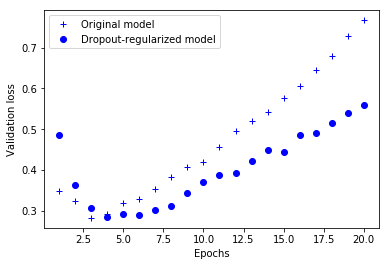

In [42]:
dpt_model_val_loss = dpt_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, dpt_model_val_loss, 'bo', label='Dropout-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

### 4.4.4 정리


신경망에서 과대적합을 방지하기 위해 가장 널리 사용하는 방법은 다음과 같다.

- 훈련 데이터를 더 모은다.

- 네트워크 용량을 감소 시킨다(파라미터 수를 줄인다).

- 가중치 규제($l1, l2$)를 추가한다.

- 드롭아웃을 추가한다.

## 4.5 보편적인 머신러닝 작업 흐름



1. 문제 정의와 데이터 수집
2. 성공 지표 선택
   - 성공의 지표가 모델이 최적화할 손실 함수를 선택하는 기준이 된다.
   - 클래스가 분포가 균일한 분류 문제에서는 정확도와 [ROC AUC](https://github.com/ExcelsiorCJH/Hands-On-ML/blob/master/Chap03-Classification/Chap03-Classification.ipynb)가 일반적인 지표다.
   - 랭킹 문제나 다중 레이블 문제에는 **평균 정밀도**(Mean Average Precision)를 사용할 수 있다.
3. 평가 방법 선택
   - Hold-out 검증 세트 분리 : 데이터가 많을 때 사용
   - K-fold cross-valication : 홀드아웃 검증을 사용하기에 샘플의 수가 적을 때 사용
   - Iterated K-fold validation : 데이터가 적고 매우 정확한 모델 평가가 필요할 때 사용
4. 데이터 준비
   - 입력 데이터와 타겟 데이터 텐서를 준비한다.
5. 기본(baseline)보다 나은 모델 개발하기
   - 아주 단순한 모델보다 나은 수준의 모델을 개발한다.
   - 마지막 층의 활성화 함수, 손실함수, 최적화 설정 등
6. 과대적합 모델 만들기
   - 적절한 모델을 설정하기 위해 과대적합 모델을 만든 뒤 과대적합 모델 보다 작은 모델을 만들기 위해 비교한다.
7. 모델 규제와 하이퍼파라미터 튜닝
   - 드롭아웃 추가
   - 층을 추가하거나 제거해서 다른 구조를 시도
   - L1이나 L2 규제를 추가
   - 하이퍼파라미터(learning rate, 층의 유닛 수 등) 조정
   - 특성 공학 시도